In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from matplotlib import pyplot as plt 

from datasets.Dataset import Dataset
from argo.core.ArgoLauncher import ArgoLauncher
from argo.core.TFDeepLearningModel import load_model, load_network, load_model_without_session
from argo.core.utils.argo_utils import load_class


W0120 12:44:05.194743 140215686801216 deprecation_wrapper.py:119] From /data1/env/tf1.14.0/lib/python3.6/site-packages/sonnet/python/custom_getters/restore_initializer.py:27: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0120 12:44:06.220829 140215686801216 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0120 12:44:06.649725 140215686801216 deprecation_wrapper.py:119] From /home/hector/prediction/core/argo/core/hooks/ArgoHook.py:25: The name tf.train.SessionRunHook is deprecated. Please use tf.estimator.SessionRunHook instead.

W0120 12:44:06.782764 140215686801216 deprecation_wrapper.py:119] From /home/hector/predictio

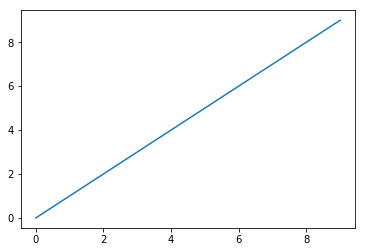

In [2]:
plt.plot(np.arange(10))

In [16]:
# Import `tensorflow`
import tensorflow as tf
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2" 
# Initialize two constants
# Import `tensorflow`

# Initialize two constants
a=np.arange(1,61,1)
#print(a)
x1=tf.constant(a, shape=(2,10, 3),dtype=tf.float32) 
tie=tf.tile(x1,[1,1,1])
x2= tf. add(tie,-2)
reshape= tf.reshape(x2, (1,2,10,3)) 
average=tf.reduce_mean(reshape,axis=0)
# Initialize Session and run `result`
with tf.Session() as sess:
  output = sess.run(x2)
  average = sess.run(average)
  print(output,output.shape)
  print('add')
  print(average)


[[[-1.  0.  1.]
  [ 2.  3.  4.]
  [ 5.  6.  7.]
  [ 8.  9. 10.]
  [11. 12. 13.]
  [14. 15. 16.]
  [17. 18. 19.]
  [20. 21. 22.]
  [23. 24. 25.]
  [26. 27. 28.]]

 [[29. 30. 31.]
  [32. 33. 34.]
  [35. 36. 37.]
  [38. 39. 40.]
  [41. 42. 43.]
  [44. 45. 46.]
  [47. 48. 49.]
  [50. 51. 52.]
  [53. 54. 55.]
  [56. 57. 58.]]] (2, 10, 3)
add
[[[-1.  0.  1.]
  [ 2.  3.  4.]
  [ 5.  6.  7.]
  [ 8.  9. 10.]
  [11. 12. 13.]
  [14. 15. 16.]
  [17. 18. 19.]
  [20. 21. 22.]
  [23. 24. 25.]
  [26. 27. 28.]]

 [[29. 30. 31.]
  [32. 33. 34.]
  [35. 36. 37.]
  [38. 39. 40.]
  [41. 42. 43.]
  [44. 45. 46.]
  [47. 48. 49.]
  [50. 51. 52.]
  [53. 54. 55.]
  [56. 57. 58.]]]


In [24]:
import tensorflow_probability as tfp
tfd = tfp.distributions

# Define a single scalar Normal distribution.
dist = tfd.Normal(loc=0., scale=3.)

# Evaluate the cdf at 1, returning a scalar.
dist.cdf(1.)

# Define a batch of two scalar valued Normals.
# The first has mean 1 and standard deviation 11, the second 2 and 22.
dist = tfd.Normal(loc=[1, 2.,1.5], scale=[11, 22,.12])
dist1=dist.log_prob(x2)
#dist1=tf.pow(dist1,1)
# Evaluate the pdf of the first distribution on 0, and the second on 1.5,
# returning a length two tensor.
print(dist1)


# Get 3 samples, returning a 3 x 2 tensor.
#dist.sample([3])
#with tf.Session() as sess:
  #output = sess.run(dist1)
#print(output.shape)

Tensor("Normal_27/log_prob/sub:0", shape=(2, 10, 3), dtype=float32)


In [3]:
# CREATE SESSION
tf.set_random_seed(1000)

tf.reset_default_graph()

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='1'
sess_config = tf.ConfigProto()
sess_config.gpu_options.allow_growth=True
sess = tf.Session(config = sess_config)

In [4]:
# NB i saved the model every 20 epochs
#ff_global_step = 486000
# ffconffile = "/data1/mcmc/sept_drop/NNewDroo/CMB-d%50-n11/FF-cLL-st0-stp0-bs32-trA_lrm1e-09E.i1e-04.s3e+03.r0.9_bo0.9_bt0.999-cGN100-VGGB_dc0_dr0.05_bnm0.99_bnr0_TriL_mc0.0001-aLR-wign-bic1.0-wrLtwo0.003-brLtwo0.0001-r0/experiment.conf"
# ffconffile = "/data/captamerica_hd1/mcmc/freeze_staircase/CMB-d%100-n11/FF-cLL-st0-stp0-bs32-trA_lrm1e-09E.i1e-04.s6e+03.r0.9_bo0.9_bt0.999-cGN100-BVGG_fl1_rn1_f16.16.32.32.32_mp-TriL_b0_fl1-LIgn-c10.0-klrLtwo1e-05-ksrLtwo1e-05-blrLtwo1e-05-SCM-1.6-PSc1.0-tr1-r0/experiment.conf"
ffconffile = '/data/ironman_hd1/mcmc/bayesian_Pol/CMB-d%100-n11/FF-cLL-st0-stp0-bs32-trA_lrm1e-09E.i1e-04.s6e+03.r0.9_bo0.9_bt0.999-cGN100-BVGG_fl1_rn1_f16.16.32.32.32_mp-TriL_b0_fl1-LIgn-c10-klrLtwo1e-05-ksrLtwo1e-05-blrLtwo1e-05-SCM-1.6-PSc1.0-tr1-r0/experiment.conf'
ff_global_step = None


In [5]:
# ff_dataset_conf, ff_model_parameters, ff_config = ArgoLauncher.process_conf_file(ffconffile)
# dataset = Dataset.load_dataset(ff_dataset_conf)

In [6]:
# LOAD THE MODEL BUT NOT THE MONITORED SESSION SINCE WE WANT TO CONTROL THE SESSION
model, dataset, checkpoint_name = load_model_without_session(ffconffile,global_step=ff_global_step, model_class_base_path="core")

43200 are going to be loaded in memory
4800 are going to be loaded in memory


W1203 18:28:59.504005 139932174079744 deprecation_wrapper.py:119] From /data1/env/tf1.14.0/lib/python3.5/site-packages/sonnet/python/modules/base.py:177: The name tf.make_template is deprecated. Please use tf.compat.v1.make_template instead.

W1203 18:28:59.787890 139932174079744 deprecation.py:506] From /data1/env/tf1.14.0/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1288: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1203 18:28:59.809685 139932174079744 deprecation_wrapper.py:119] From /data1/env/tf1.14.0/lib/python3.5/site-packages/sonnet/python/modules/base.py:278: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1203 18:28:59.813550 139932174079744 deprecation_wrapper.py:119] From /data1/env/tf1.14.0/lib/pytho

12000 are going to be loaded in memory
found 35 layers
found 4 layers
['flatten',
 'dense',
 'dense_1',
 'dense_2',
 'conv2d_flipout',
 'batch_normalization',
 'leaky_re_lu',
 'conv2d_flipout_1',
 'batch_normalization_1',
 'leaky_re_lu_1',
 'max_pooling2d',
 'conv2d_flipout_2',
 'batch_normalization_2',
 'leaky_re_lu_2',
 'conv2d_flipout_3',
 'batch_normalization_3',
 'leaky_re_lu_3',
 'max_pooling2d_1',
 'conv2d_flipout_4',
 'batch_normalization_4',
 'leaky_re_lu_4',
 'conv2d_flipout_5',
 'batch_normalization_5',
 'leaky_re_lu_5',
 'max_pooling2d_2',
 'conv2d_flipout_6',
 'batch_normalization_6',
 'leaky_re_lu_6',
 'conv2d_flipout_7',
 'batch_normalization_7',
 'leaky_re_lu_7',
 'max_pooling2d_3',
 'conv2d_flipout_8',
 'batch_normalization_8',
 'leaky_re_lu_8',
 'conv2d_flipout_9',
 'batch_normalization_9',
 'leaky_re_lu_9',
 'max_pooling2d_4']

found 10 BatchNorm layers
found 10 Flipout layers
found 0 Reparameterization layers

found 36 keras regularizers
[<tf.Tensor 'ff_network_1/Tr

In [7]:
checkpoint_name

'/data/ironman_hd1/mcmc/bayesian_Pol/CMB-d%100-n11/FF-cLL-st0-stp0-bs32-trA_lrm1e-09E.i1e-04.s6e+03.r0.9_bo0.9_bt0.999-cGN100-BVGG_fl1_rn1_f16.16.32.32.32_mp-TriL_b0_fl1-LIgn-c10-klrLtwo1e-05-ksrLtwo1e-05-blrLtwo1e-05-SCM-1.6-PSc1.0-tr1-r0/saved_models/model.ckpt-162000'

In [8]:
model.prediction_mean

<tf.Tensor 'ff_network_1/TriL/MultivariateNormalTriL/mean/add:0' shape=(?, 3) dtype=float32>

In [9]:
model.x

<tf.Tensor 'inputs:0' shape=(?, 256, 256, 3) dtype=float32>

In [10]:
is_training = model.is_training

In [11]:
# INPUTS
#before any form of preprocessing and augmentation (if present)
raw_x = model.raw_x
x = model.x
y = model.y


In [12]:
def create_mu_bar_sigma_bar(x, network, dim, nsamples=5, scope="bar"):
    
    with tf.name_scope(scope) as scope: 
    
        dtype = x.dtype
        
        empty = np.transpose(np.array([[],]*dim), [1,0])
        samples_stack = tf.constant(empty, dtype=dtype)
        
        i = tf.constant(0, dtype=tf.int32, name="i0")
        
        def cond(i, samples_stack):
            return i < nsamples

        
        def body(i, samples_stack):
            distr = network(x)
            samples_stack = tf.concat([samples_stack, distr.sample()], axis=0)
            return i+1, samples_stack
        
        i = tf.constant(0)
        i, samples_stack = tf.while_loop(cond,
                                        body,
                                        loop_vars=[i, samples_stack],
                                        parallel_iterations=10,
                                        shape_invariants=[i.get_shape(), tf.TensorShape([None, dim])])

    return samples_stack



In [13]:
nsamples = 10
x_repeat = tf.tile(x, [nsamples, 1, 1, 1])
repeated_distr = model._network(x_repeat, is_training=model.is_training)
# repeated_samples = create_mu_bar_sigma_bar(x, model._network, model.prediction_mean.shape[1], nsamples=nsamples)

In [14]:
# RESTORE THE WEIGHTS
saver = tf.train.Saver(None, max_to_keep=None, save_relative_paths=True)
saver.restore(sess, checkpoint_name)
# TEST THAT ALL WAS FINE (if weights are not restore will complain that they are uninitialized)

W1203 18:29:22.686587 139932174079744 deprecation.py:323] From /data1/env/tf1.14.0/lib/python3.5/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
I1203 18:29:22.690189 139932174079744 saver.py:1280] Restoring parameters from /data/ironman_hd1/mcmc/bayesian_Pol/CMB-d%100-n11/FF-cLL-st0-stp0-bs32-trA_lrm1e-09E.i1e-04.s6e+03.r0.9_bo0.9_bt0.999-cGN100-BVGG_fl1_rn1_f16.16.32.32.32_mp-TriL_b0_fl1-LIgn-c10-klrLtwo1e-05-ksrLtwo1e-05-blrLtwo1e-05-SCM-1.6-PSc1.0-tr1-r0/saved_models/model.ckpt-162000


In [15]:
from argo.core.network.KerasNetwork import KerasNetwork

# NETWORK
network = model._network

if isinstance(network, KerasNetwork):
    # FOR KERAS
    net_model = model._network._net_model
    distr_model = model._network._distr_model
else:
    # FOR SONNET
    distr_model = model._network.module._distr_model

calibration_tril = distr_model.calibration_tril
calibration_tril_params = distr_model._calibration_tril_params
distr = model.prediction_distr

In [21]:
distr_model

In [22]:
calibration_vars_for_3 = distr_model.dense_loc.weights+[calibration_tril_params]

In [23]:
calibration_vars_for_3

[<tf.Variable 'ff_network_1/TriL/dense/kernel:0' shape=(2048, 3) dtype=float32>,
 <tf.Variable 'ff_network_1/TriL/dense/bias:0' shape=(3,) dtype=float32>,
 <tf.Variable 'ff_network/calibration_tril_params:0' shape=(6,) dtype=float32>]

In [24]:
distr_model.weights

[<tf.Variable 'ff_network_1/TriL/dense/kernel:0' shape=(2048, 3) dtype=float32>,
 <tf.Variable 'ff_network_1/TriL/dense/bias:0' shape=(3,) dtype=float32>,
 <tf.Variable 'ff_network_1/TriL/dense_1/kernel:0' shape=(2048, 3) dtype=float32>,
 <tf.Variable 'ff_network_1/TriL/dense_1/bias:0' shape=(3,) dtype=float32>,
 <tf.Variable 'ff_network_1/TriL/dense_2/kernel:0' shape=(2048, 3) dtype=float32>,
 <tf.Variable 'ff_network_1/TriL/dense_2/bias:0' shape=(3,) dtype=float32>,
 <tf.Variable 'ff_network/calibration_tril_params:0' shape=(6,) dtype=float32>]

In [25]:
sess.run([calibration_tril, calibration_tril_params])

[array([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1.], dtype=float32)]

In [22]:
%%time
np_samples = [] 
for i in range(nsamples):
    np_samples.append(sess.run(distr.parameters['loc'], feed_dict={model.x: np.ones((1, 256, 256, 3))}))

np_samples = np.squeeze(np.stack(np_samples))


CPU times: user 2.28 s, sys: 492 ms, total: 2.78 s
Wall time: 7.44 s


In [23]:
print(np_samples.shape, np.mean(np_samples, axis=0))

(10, 3) [-0.870959   -1.8646564   0.87731713]


In [25]:
%%time
tf_samples = sess.run(repeated_distr.parameters['loc'], feed_dict={model.x: np.ones((1, 256, 256, 3))})

CPU times: user 440 ms, sys: 48 ms, total: 488 ms
Wall time: 492 ms


In [26]:
print(tf_samples.shape, np.mean(tf_samples, axis=0))

(10, 3) [-0.87007445 -1.8737339   0.8546548 ]


In [27]:
# DATASET SECTION

# these are all the datasets tag available
from datasets.Dataset import TRAIN_LOOP, TRAIN, VALIDATION, TEST, \
                TRAIN_SHUFFLED, VALIDATION_SHUFFLED, TEST_SHUFFLED

datasets_initializers = model.datasets_initializers
ds_handle = model.ds_handle
datasets_handles = sess.run(model.datasets_handles_nodes)
print(datasets_initializers)
print(datasets_handles)

{'test_shuffled': <tf.Operation 'MakeIterator_5' type=MakeIterator>, 'validation': <tf.Operation 'MakeIterator_1' type=MakeIterator>, 'train': <tf.Operation 'MakeIterator' type=MakeIterator>, 'validation_shuffled': <tf.Operation 'MakeIterator_4' type=MakeIterator>, 'test': <tf.Operation 'MakeIterator_2' type=MakeIterator>, 'train_shuffled': <tf.Operation 'MakeIterator_3' type=MakeIterator>}
{'validation_shuffled': b'\n,/job:localhost/replica:0/task:0/device:CPU:0\x12\tlocalhost\x1a\x0f_4_IteratorV2_4 \x88\xca\x87\xfe\xca\xce\x8d\xf5:*%N10tensorflow4data16IteratorResourceE', 'test_shuffled': b'\n,/job:localhost/replica:0/task:0/device:CPU:0\x12\tlocalhost\x1a\x0f_5_IteratorV2_5 \x88\xca\x87\xfe\xca\xce\x8d\xf5:*%N10tensorflow4data16IteratorResourceE', 'validation': b'\n,/job:localhost/replica:0/task:0/device:CPU:0\x12\tlocalhost\x1a\x0f_3_IteratorV2_1 \x88\xca\x87\xfe\xca\xce\x8d\xf5:*%N10tensorflow4data16IteratorResourceE', 'train': b'\n,/job:localhost/replica:0/task:0/device:CPU:0\x12

In [28]:
bs = tf.shape(distr.parameters['loc'])[0]
ps = distr.parameters['loc'].shape[1]
repeated_sample = tf.reshape(repeated_distr.sample(), [-1,bs,ps])
mu_bar = tf.reduce_mean(repeated_sample, axis=0)
sigma_bar = tfp.stats.covariance(repeated_sample, sample_axis=0, event_axis=-1)
calibration_scalar_bar = tf.get_variable("calibration_scalar_bar",
                                    shape = (),
                                    dtype = mu_bar.dtype,
                                    initializer=tf.initializers.constant(1.))

distr_bar = tfp.distributions.MultivariateNormalFullCovariance(loc = mu_bar, covariance_matrix = calibration_scalar_bar*sigma_bar)

W1203 13:08:01.183656 139830050121472 deprecation.py:323] From /data1/env/tf1.14.0/lib/python3.5/site-packages/tensorflow_probability/python/stats/sample_stats.py:693: setdiff1d (from tensorflow.python.ops.array_ops) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


In [30]:
sess.run(mu_bar, feed_dict={model.x: np.ones((10, 256, 256, 3))})

array([[-0.8087219 , -1.888662  ,  0.89293706],
       [-0.83620226, -1.8956339 ,  0.8148216 ],
       [-0.86583644, -1.8834718 ,  0.7882209 ],
       [-0.7660073 , -1.9089873 ,  0.78894943],
       [-0.80293655, -1.8970101 ,  0.8587028 ],
       [-0.88309133, -1.8879697 ,  0.802112  ],
       [-0.9110376 , -1.884928  ,  0.9219307 ],
       [-0.8600849 , -1.8402784 ,  0.9237768 ],
       [-0.87770146, -1.8761364 ,  0.83460844],
       [-0.8920382 , -1.8913221 ,  0.8878106 ]], dtype=float32)

In [ ]:
distr.parameters

In [31]:
import tensorflow_probability as tfp
loc = distr.parameters["loc"]
scale_tril = distr.parameters["scale_tril"]

calibration_scalar = tf.get_variable("calibration_scalar",
                                    shape = (),
                                    dtype = loc.dtype,
                                    initializer=tf.initializers.constant(1.))

sc_distr = tfp.distributions.MultivariateNormalTriL(loc = loc, scale_tril = calibration_scalar*scale_tril)


In [33]:
# GLOBAL STEP
global_step_restore_int = sess.run(model.global_step)
cal_global_step = tf.get_variable("cal_global_step",
                                    shape = (),
                                    dtype = tf.int64,
                                    initializer=tf.initializers.constant(0))



ValueError: Variable cal_global_step already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-32-2101a4a61b5a>", line 6, in <module>
    initializer=tf.initializers.constant(0))
  File "/data1/env/tf1.14.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/data1/env/tf1.14.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/data1/env/tf1.14.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/data1/env/tf1.14.0/lib/python3.5/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)


In [34]:
# DEFINE OPTIMIZER
optimizer_tuple = ("AdamOptimizer", {"learning_rate" :
                                        (1e-6,
                                        "exponential_decay", {"learning_rate" : 1e-4,
                                                              "decay_steps" : 6000, # frac: 100->100000, 60->50000, 50->40000
                                                              # total train samples: 43200. 43200/32 = 1350 steps per epoch
                                                              "decay_rate" : 0.9,
                                                              "staircase" : True
                                                             }
                                         ),
                                  "beta1" : 0.9,
                                  "beta2" : 0.999})

In [ ]:
from argo.core.optimizers.LearningRates import process_learning_rate
from argo.core.utils.argo_utils import eval_method_from_tuple

optimizer_name = optimizer_tuple[0]
optimizer_kwargs = optimizer_tuple[1]

lr = process_learning_rate(optimizer_kwargs["learning_rate"], cal_global_step)
optimizer_kwargs["learning_rate"] = lr


In [ ]:
def create_training_op(optimizer, total_loss, global_step, var_list=None, update_ops=[], clip_value=100):
    # 1st part of minimize: compute_gradient
    grads_and_vars = optimizer.compute_gradients(total_loss, var_list=var_list)

    # clip gradients
    grads_and_vars_not_none = [(g, v) for (g, v) in grads_and_vars if g is not None]
    grads = [g for (g, v) in grads_and_vars_not_none]
    variables = [v for (g, v) in grads_and_vars_not_none]
    clipped_grads, global_norm = tf.clip_by_global_norm(grads, clip_value)
    clipped_grads_and_vars = [(clipped_grads[i], variables[i]) for i in range(len(grads))]    
    
    # 2nd part of minimize: apply_gradient
    optimizer_step = optimizer.apply_gradients(clipped_grads_and_vars, global_step=global_step)
    
    update_ops = tf.group(*update_ops)
    training_op = tf.group(update_ops, optimizer_step)
    return training_op

In [ ]:
def make_one_epoch(training_op, nodes, DATASET_STR):
    sess.run(datasets_initializers[DATASET_STR])
    while True:
        try:
            _, nodes_np = sess.run([training_op,
                                        nodes],
                                        feed_dict={
                                            ds_handle : datasets_handles[DATASET_STR]
                                        }
                                       )

        except tf.errors.OutOfRangeError:
                break


# def create_mu_bar_sigma_bar(x, distr, nsamples=5, scope="bar"):
#     loc = distr.parameters["loc"]
#     scale_tril = distr.parameters["scale_tril"]
#     cov = tf.einsum("bij,bjk->bik", scale_tril, tf.transpose(scale_tril, perm=[0,2,1]))
# #     n_samples = tf.placeholder_with_default(n_samples,)
    
#     x_repeat = tf.tile(x, [nsamples, 1, 1, 1])
    
#     dim = loc.shape[1]
    
#     with tf.variable_scope(scope) as scope: 
    
#         loc_shape = loc.shape.as_list()
#         if len(loc_shape) != 2:
#             raise RuntimeError("loc is expected to be a 2D tensor. Found shape {:}".format(loc_shape))

#         cov_shape = cov.shape.as_list()
#         if len(cov_shape) != 3:
#             raise RuntimeError("cov is expected to be a 3D tensor. Found shape {:}".format(cov_shape))
        
#         dtype = loc.dtype
        
#         empty = np.transpose(np.array([[],]*dim), [1,0])
#         mu_stack = tf.constant(empty, dtype=dtype)

#         empty = np.transpose(np.array([[[],]*dim]*dim), [2,1,0])
#         sigma_stack = tf.constant(empty, dtype=dtype)
        
#         i = tf.constant(0, dtype=tf.int32, name="i0")
        
#         def cond(i, mu_stack, sigma_stack):
#             return i < nsamples

        
#         def body(i, mu_stack, sigma_stack):
#             mu_stack = tf.concat([mu_stack, loc], axis=0)
#             sigma_stack = tf.concat([sigma_stack, cov], axis=0)
#             return i+1, mu_stack, sigma_stack
        
#         i = tf.constant(0)
#         i, mu_stack, sigma_stack = tf.while_loop(cond,
#                                                 body,
#                                                 loop_vars=[i, mu_stack, sigma_stack],
#                                                 parallel_iterations=10,
#                                                 shape_invariants=[i.get_shape(), tf.TensorShape([None, dim]), tf.TensorShape([None, dim, dim])])

#     return x_repeat, mu_stack, sigma_stack


# def create_mu_bar_sigma_bar_samples(x, distr, nsamples=5, scope="bar"):
#     samples = tf.stack([distr.sample() for s in range(nsamples)])
    
#     x_repeat = tf.tile(x, [nsamples, 1, 1, 1])
    
#     mu_bar = tf.reduce_mean(samples, axis=0)
#     sigma_bar = tfp.stats.covariance(samples, sample_axis=0, event_axis=-1)
    
#     return x_repeat, samples, mu_bar, sigma_bar
    
    
def prepare_training(distr, y, optimizer_tuple, global_step, var_list):
    cal_nll = tf.reduce_mean(-distr.log_prob(y), name="nll")
    optimizer = eval_method_from_tuple(tf.train, optimizer_tuple)
    training_op = create_training_op(optimizer, cal_nll, global_step, var_list=var_list)
    optimizer_variables = optimizer.variables()
    sess.run(tf.variables_initializer(optimizer_variables))
    sess.run(tf.variables_initializer([global_step]+var_list))
    return cal_nll, training_op


In [ ]:
from argo.core.hooks.LoggerHelper import LoggerHelper
log_dir = "/data1/calibration/try_last"

In [ ]:
# METHOD 3 fine tune last layer
cal_last_nll, last_training_op = prepare_training(distr, y, optimizer_tuple, cal_global_step, calibration_vars_for_3)

smean = tf.linalg.trace(calibration_tril)/3.
tensors_nodes = [cal_last_nll, smean]
tensors_names = ["nll", "calibration_scmean"]
logger = LoggerHelper(log_dir, "t_scaling_last", tensors_names, tensors_nodes)

In [ ]:
#TRAINING LOOP FOR CALIBRATION
calibration_datasets = [TRAIN, VALIDATION]
nepochs = 30

sess_extra_args = logger.get_sess_run_args()
logger.reset(sess)

for i in range(nepochs):
    for DATASET_STR in calibration_datasets:
        make_one_epoch(last_training_op, sess_extra_args, DATASET_STR)
    
    logger.log(sess, i)
    logger.reset(sess)
    logger.plot()



In [ ]:
sess.run(calibration_tril)


In [ ]:
# CREATE TRAINING OP FOR SCALAR CALIBRATION
cal_sc_bar_nll, sc_bar_training_op = prepare_training(distr_bar, y, optimizer_tuple, cal_global_step, [calibration_scalar_bar])
tensors_nodes = [cal_sc_bar_nll, calibration_scalar_bar]
tensors_names = ["nll", "calibration_sc"]
logger = LoggerHelper(log_dir, "t_scaling_sc_bar", tensors_names, tensors_nodes)

In [ ]:
#TRAINING LOOP FOR CALIBRATION
calibration_datasets = [TRAIN, VALIDATION]
nepochs = 30

sess_extra_args = logger.get_sess_run_args()
logger.reset(sess)

for i in range(nepochs):
    for DATASET_STR in calibration_datasets:
        make_one_epoch(sc_bar_training_op, sess_extra_args, DATASET_STR)
    
    logger.log(sess, i)
    logger.reset(sess)
    logger.plot()

sess.run(calibration_scalar_bar)


In [ ]:
x_repeat, mu_stack, sigma_stack = create_mu_bar_sigma_bar(x, distr, nsamples=3, scope="bar")

In [ ]:
x_repeat, samples, mu_bar, sigma_bar = create_mu_bar_sigma_bar_samples(x, distr, nsamples=100, scope="bar")

In [ ]:
x_repeat_np, samples_np, mu_bar_np, sigma_bar_np = sess.run([x_repeat, samples, mu_bar, sigma_bar], feed_dict={
                                            ds_handle : datasets_handles[TRAIN_LOOP]
                                        })

In [ ]:
samples_np[3, 1]

In [ ]:
x_repeat_np, mu_stack_np, sigma_stack_np = sess.run([x_repeat , mu_stack, sigma_stack], feed_dict={
                                            ds_handle : datasets_handles[TRAIN_LOOP]
                                        })

In [ ]:
np.allclose(mu_stack_np[0], mu_stack_np[33]) 

In [ ]:
mu_stack_np[33]

In [ ]:
samples = distr.sample(500)

In [ ]:
samples_np.shape

In [ ]:
loc_np, samples_np = sess.run([loc, samples], feed_dict={
                                            ds_handle : datasets_handles[TRAIN_LOOP]
                                        })

In [ ]:
loc_np

In [ ]:
samples_np.mean(axis=0)

In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ["loss", "nll"])


In [ ]:
df.loc[0] = [0.4, 0.7]
df.loc[1] = [0.4, 0.7]
df.loc[2] = [0.2, 1.]


In [ ]:
df.columns

In [ ]:
from matplotlib import pyplot as plt
df.plot(subplots=True, sharex=True)
plt.show()

In [ ]:
#CREATE TRAINING OP FOR TRIL CALIBRATION
cal_nll = tf.reduce_mean(-distr.log_prob(y), name="nll")
tril_optimizer = eval_method_from_tuple(tf.train, (optimizer_name, optimizer_kwargs))
tril_training_op = create_training_op(tril_optimizer, cal_nll, cal_global_step, var_list=[calibration_tril_params])
tril_optimizer_variables = tril_optimizer.variables()

# variables of the optimizer need to be initialized
sess.run(tf.variables_initializer(tril_optimizer_variables))
sess.run(tf.variables_initializer([cal_global_step]))

tensors_nodes = [cal_nll]
tensors_names = ["nll", "calibration_tril"]

logger = LoggerHelper(log_dir, "temp_scaling_tril", tensors_names, tensors_nodes)

In [ ]:
#TRAINING LOOP FOR TRIL CALIBRATION
calibration_datasets = [TRAIN, VALIDATION]
nepochs = 30

sess_extra_args = logger.get_sess_run_args()
logger.reset(sess)

for i in range(nepochs):
    for DATASET_STR in calibration_datasets:
        make_one_epoch(tril_training_op, sess_extra_args, DATASET_STR)
    
    logger.log(sess, i)
    logger.reset(sess)
    logger.plot()

sess.run(calibration_tril_params)


In [ ]:
# CREATE TRAINING OP FOR SCALAR CALIBRATION
cal_sc_nll = tf.reduce_mean(-sc_distr.log_prob(y), name="nll")
sc_optimizer = eval_method_from_tuple(tf.train, (optimizer_name, optimizer_kwargs))
sc_training_op = create_training_op(sc_optimizer, cal_sc_nll, cal_global_step, var_list=[calibration_scalar])
sc_optimizer_variables = sc_optimizer.variables()

sess.run(tf.variables_initializer(sc_optimizer_variables))
sess.run(tf.variables_initializer(cal_global_step))
sess.run(tf.variables_initializer([calibration_scalar]))

In [ ]:
sc_optimizer_variables

In [ ]:
#TRAINING LOOP FOR TRIL CALIBRATION
calibration_datasets = [TRAIN, VALIDATION]
nepochs = 1

for i in range(nepochs):
    for DATASET_STR in calibration_datasets:
        make_one_epoch(sc_training_op, [cal_sc_nll], DATASET_STR)

sess.run(calibration_scalar)


In [ ]:
sess.run(calibration_tril_params)

In [ ]:
# RUN ONLY AT THE VERY END TO SAVE THE NETWORK
path = "verymeaningfulnameformycalibratednetwork.ckpt"
saver.save(sess, path)